In [49]:
!pip install rasterio
!pip install osmnx
!pip install mapclassify folium matplotlib

In [50]:
import osmnx as ox
from osgeo import gdal
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from shapely.geometry import LineString
from rasterio.mask import mask
import rasterio

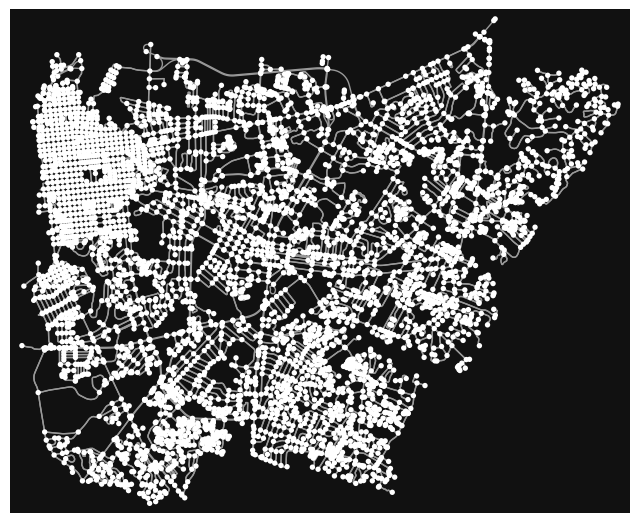

(<Figure size 800x800 with 1 Axes>, <Axes: >)

In [136]:
place_name = "Wilmington, North Carolina, USA"
G = ox.graph_from_place(place_name, network_type='drive')
ox.plot_graph(G)


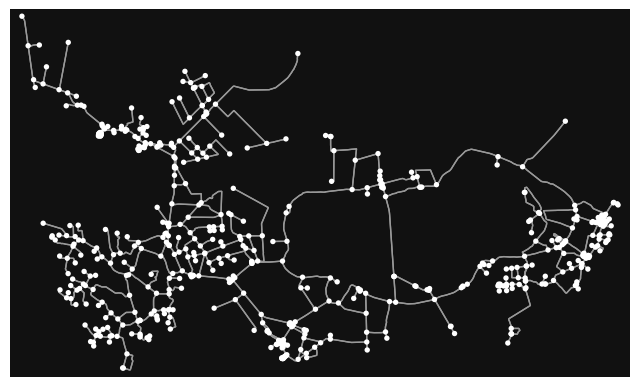

(<Figure size 800x800 with 1 Axes>, <Axes: >)

In [137]:
place_name = "Hyde County, NC, USA" # Changed the place name to be more specific and corrected potential typo
graph = ox.graph_from_place(place_name, network_type='drive')
ox.plot_graph(graph)


In [53]:
Wilmington_drive = ox.speed.add_edge_speeds(G)
Wilmington_drive = ox.speed.add_edge_travel_times(G)

C:\Users\tasni\AppData\Local\Temp\ipykernel_36748\3473553248.py:1: FutureWarning: The `add_edge_speeds` function has moved to the `routing` module. Calling `speed.add_edge_speeds` is deprecated and will be removed in the v2.0.0 release. Call it via `routing.add_edge_speeds` instead. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  Wilmington_drive = ox.speed.add_edge_speeds(G)
C:\Users\tasni\AppData\Local\Temp\ipykernel_36748\3473553248.py:2: FutureWarning: The `add_edge_travel_times` function has moved to the `routing` module. Calling `speed.add_edge_travel_times` is deprecated and will be removed in the v2.0.0 release. Call it via `routing.add_edge_travel_times` instead. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  Wilmington_drive = ox.speed.add_edge_travel_times(G)


In [54]:
Wilmington_drive = ox.elevation.add_node_elevations_raster(Wilmington_drive, 'Copernicus_DSM_COG_10_N34_00_W078_00_HAND (3).tif', cpus=1)
Wilmington_drive = ox.add_edge_grades(Wilmington_drive, add_absolute=True)

In [107]:
Wilmington_drive_node, Wilmington_drive_edge = ox.graph_to_gdfs(Wilmington_drive)
Wilmington_drive_node

,y,x,street_count,elevation,highway,geometry
osmid,,,,,,
172430723,34.188482,-77.865391,1,5.507142,NaN,POINT (-77.86539 34.18848)
172430724,34.188797,-77.865052,3,5.507162,NaN,POINT (-77.86505 34.18880)
172430728,34.188937,-77.864525,1,6.537331,NaN,POINT (-77.86453 34.18894)
172430736,34.188552,-77.864869,3,5.507162,NaN,POINT (-77.86487 34.18855)
172430771,34.240036,-77.905880,3,0.000020,NaN,POINT (-77.90588 34.24004)
...,...,...,...,...,...,...
12045284879,34.208235,-77.871700,1,0.000090,NaN,POINT (-77.87170 34.20823)
12045284886,34.207931,-77.869891,1,1.214840,NaN,POINT (-77.86989 34.20793)
12045284887,34.208390,-77.870600,3,0.000020,NaN,POINT (-77.87060 34.20839)


In [108]:
# Assuming Wilmington_drive_node is your DataFrame
highest_elevation = Wilmington_drive_node['elevation'].max()
lowest_elevation = Wilmington_drive_node['elevation'].min()

# Output the highest and lowest elevation values
print("Highest elevation value:", highest_elevation)
print("Lowest elevation value:", lowest_elevation)


Highest elevation value: 23.196311950683594
Lowest elevation value: 0.0


In [109]:
Wilmington_drive_node = Wilmington_drive_node.reset_index()
print(Wilmington_drive_node.columns)
Wilmington_drive_node

Index(['osmid', 'y', 'x', 'street_count', 'elevation', 'highway', 'geometry'], dtype='object')


,osmid,y,x,street_count,elevation,highway,geometry
0,172430723,34.188482,-77.865391,1,5.507142,NaN,POINT (-77.86539 34.18848)
1,172430724,34.188797,-77.865052,3,5.507162,NaN,POINT (-77.86505 34.18880)
2,172430728,34.188937,-77.864525,1,6.537331,NaN,POINT (-77.86453 34.18894)
3,172430736,34.188552,-77.864869,3,5.507162,NaN,POINT (-77.86487 34.18855)
4,172430771,34.240036,-77.905880,3,0.000020,NaN,POINT (-77.90588 34.24004)
...,...,...,...,...,...,...,...
5117,12045284879,34.208235,-77.871700,1,0.000090,NaN,POINT (-77.87170 34.20823)
5118,12045284886,34.207931,-77.869891,1,1.214840,NaN,POINT (-77.86989 34.20793)
5119,12045284887,34.208390,-77.870600,3,0.000020,NaN,POINT (-77.87060 34.20839)
5120,12045284888,34.208049,-77.870649,1,0.000000,NaN,POINT (-77.87065 34.20805)


In [110]:
# Reset the index to turn 'u', 'v', 'key' into columns
Wilmington_drive_edge = Wilmington_drive_edge.reset_index()

# Now 'u', 'v', and 'key' will be columns in the DataFrame
print(Wilmington_drive_edge.columns)

Index(['u', 'v', 'key', 'osmid', 'name', 'highway', 'oneway', 'reversed',
       'length', 'speed_kph', 'travel_time', 'grade', 'grade_abs', 'geometry',
       'lanes', 'ref', 'bridge', 'maxspeed', 'junction', 'access'],
      dtype='object')


In [111]:
Wilmington_drive_edge


,u,v,key,osmid,name,highway,oneway,reversed,length,speed_kph,travel_time,grade,grade_abs,geometry,lanes,ref,bridge,maxspeed,junction,access
0,172430723,172430724,0,16680595,Saint Luke Court,residential,False,False,46.895,39.4,4.3,0.000,0.000,"LINESTRING (-77.86539 34.18848, -77.86505 34.1...",NaN,NaN,NaN,NaN,NaN,NaN
1,172430724,172430723,0,16680595,Saint Luke Court,residential,False,True,46.895,39.4,4.3,-0.000,0.000,"LINESTRING (-77.86505 34.18880, -77.86539 34.1...",NaN,NaN,NaN,NaN,NaN,NaN
2,172430724,172430736,0,16680596,Saint Luke Court,residential,False,False,32.023,39.4,2.9,0.000,0.000,"LINESTRING (-77.86505 34.18880, -77.86487 34.1...",NaN,NaN,NaN,NaN,NaN,NaN
3,172430724,172430728,0,16680595,Saint Luke Court,residential,False,False,59.557,39.4,5.4,0.017,0.017,"LINESTRING (-77.86505 34.18880, -77.86481 34.1...",NaN,NaN,NaN,NaN,NaN,NaN
4,172430728,172430724,0,16680595,Saint Luke Court,residential,False,True,59.557,39.4,5.4,-0.017,0.017,"LINESTRING (-77.86453 34.18894, -77.86481 34.1...",NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12930,12045284887,12045284886,0,1300436377,NaN,residential,False,False,117.604,39.4,10.7,0.010,0.010,"LINESTRING (-77.87060 34.20839, -77.86983 34.2...",NaN,NaN,NaN,NaN,NaN,NaN
12931,12045284888,12045284887,0,1300436378,NaN,residential,False,True,38.129,39.4,3.5,0.000,0.000,"LINESTRING (-77.87065 34.20805, -77.87060 34.2...",NaN,NaN,NaN,NaN,NaN,NaN
12932,12156150623,172573752,0,16692066,Mayfield Court,residential,False,False,17.273,39.4,1.6,0.000,0.000,"LINESTRING (-77.90668 34.17437, -77.90669 34.1...",NaN,NaN,NaN,NaN,NaN,NaN
12933,12156150623,172573752,1,1313328008,NaN,residential,False,False,70.442,39.4,6.4,0.000,0.000,"LINESTRING (-77.90668 34.17437, -77.90692 34.1...",NaN,NaN,NaN,NaN,NaN,NaN


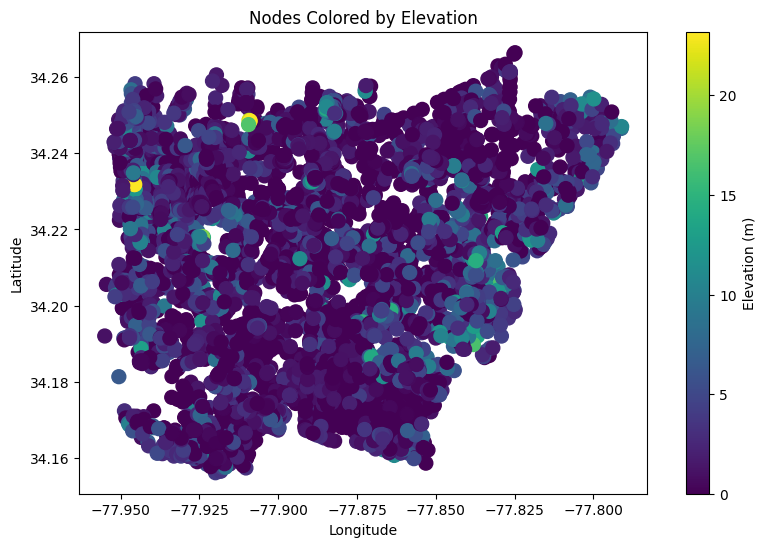

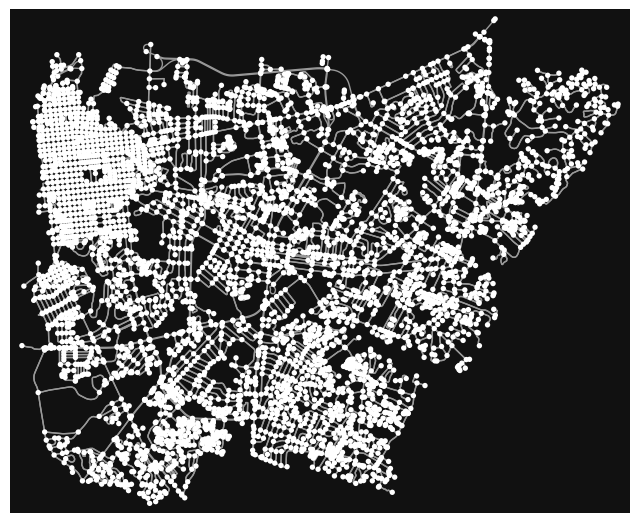

(<Figure size 800x800 with 1 Axes>, <Axes: >)

In [145]:
# Create a GeoDataFrame
df = pd.DataFrame(Wilmington_drive_node)
gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df['x'], df['y']))

# Plotting the GeoDataFrame
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
gdf.plot(column='elevation', ax=ax, legend=True, cmap='viridis', markersize=100, legend_kwds={'label': "Elevation (m)"})

# Customize plot appearance
plt.title('Nodes Colored by Elevation')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()
ox.plot_graph(G)

In [146]:
print(Wilmington_drive_edge.columns)


Index(['level_0', 'index', 'u', 'v', 'key', 'osmid', 'name', 'highway',
       'oneway', 'reversed', 'length', 'speed_kph', 'travel_time', 'grade',
       'grade_abs', 'geometry', 'lanes', 'ref', 'bridge', 'maxspeed',
       'junction', 'access', 'flood_risk'],
      dtype='object')


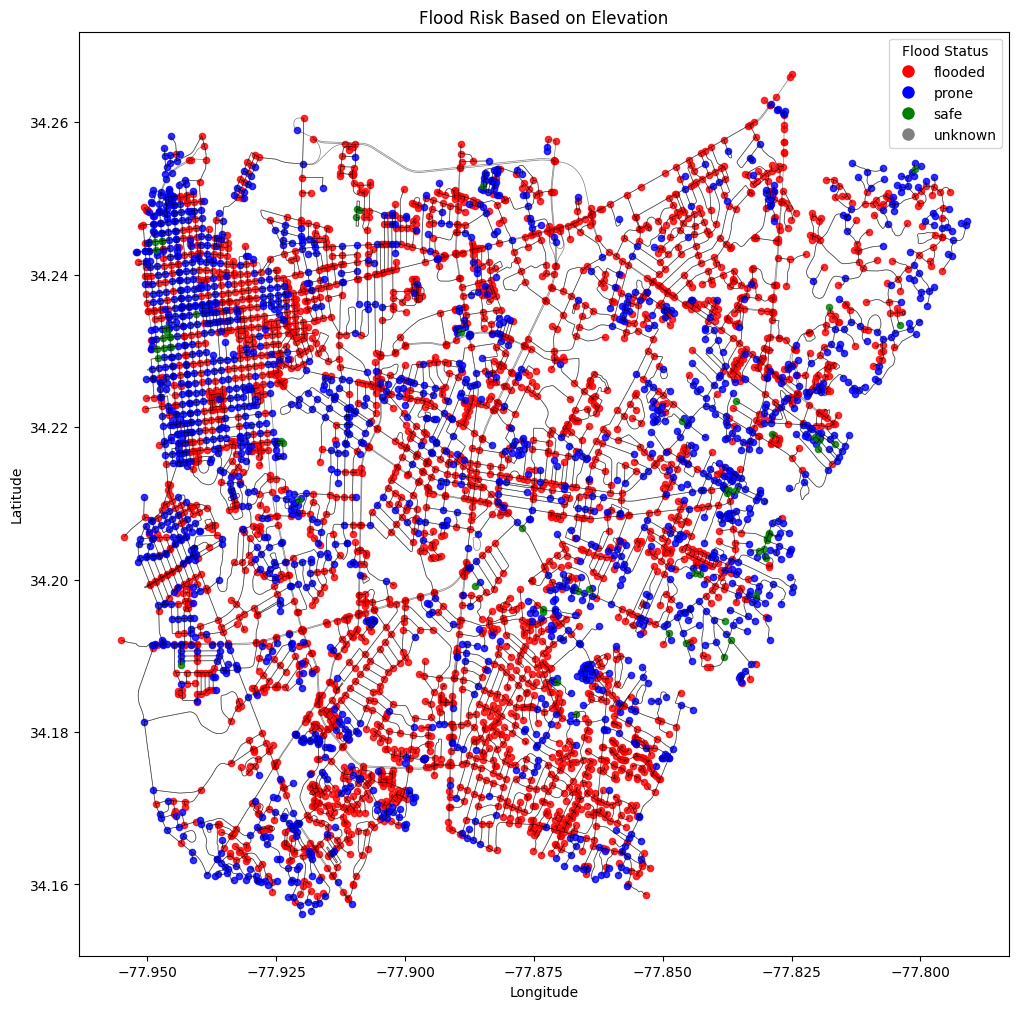

In [147]:
# Define thresholds and color mapping
flooded_threshold = 2  # Elevation <= 2 meters are considered flooded

prone_threshold = 12    # Elevation between 2 and 12 meters are prone to flooding

node_color_map = {
    'flooded': 'red',
    'prone': 'blue',
    'safe': 'green',
    'unknown': 'gray'
}

# Function to classify nodes based on elevation
def classify_node_by_elevation(elevation):
    if np.isnan(elevation):
        return 'unknown'  # Handle NaN values
    elif elevation <= flooded_threshold:
        return 'flooded'
   # elif flooded_threshold < elevation <= less_flooded_threshold:
        #return 'less_flooded'  # New classification for less flooded areas
    elif flooded_threshold < elevation <= prone_threshold:
        return 'prone'
    else:
        return 'safe'

# Now you can apply this function to classify the nodes
Wilmington_drive_node['flood_status'] = Wilmington_drive_node['elevation'].apply(classify_node_by_elevation)
Wilmington_drive_node['color'] = Wilmington_drive_node['flood_status'].map(node_color_map)


# Load the CSV file into a DataFrame (assuming it contains columns for 'elevation' and 'osmid')
csv_file = 'Wilmington_drive_edge.csv'  # Replace with the actual CSV file path
#san_drive_node = pd.read_csv(csv.file)

# Apply classification
Wilmington_drive_node['flood_status'] = Wilmington_drive_node['elevation'].apply(classify_node_by_elevation)
Wilmington_drive_node['color'] = Wilmington_drive_node['flood_status'].map(node_color_map)

# Extract the flooded data
flooded_data = Wilmington_drive_node[Wilmington_drive_node['flood_status'] == 'flooded']

# Save the flooded data to a new CSV file (optional)
flooded_data.to_csv('Blue Flooded zones.csv', index=False)

# Plotting function
def plot_flooded_areas():
    fig, ax = plt.subplots(figsize=(12, 12))

    # Plot the road network (background)
    Wilmington_drive_edge.plot(ax=ax, color='black', linewidth=0.5, alpha=0.5, label='Road Network')

    # Plot the nodes color-coded by flood status
    for status, color in node_color_map.items():
        subset = Wilmington_drive_node[Wilmington_drive_node['flood_status'] == status]
        if not subset.empty:
            subset.plot(ax=ax, color=color, markersize=20, alpha=0.8, label=status)

    # Set aspect ratio to auto to avoid errors
    ax.set_aspect('auto')

    # Add title and labels
    plt.title("Flood Risk Based on Elevation")
    plt.xlabel("Longitude")
    plt.ylabel("Latitude")

    # Create custom legend handles
    handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10, label=status)
               for status, color in node_color_map.items()]

    # Add the legend to the plot
    ax.legend(handles=handles, title="Flood Status", loc='upper right')

    # Show the plot
    plt.show()

# Call the function to plot
plot_flooded_areas()

In [148]:
def label_flood_risk(df, threshold):


    """
    Labels each edge in the dataframe based on the elevation of u and v endpoints.

    Parameters:
    df : pandas.DataFrame
        DataFrame containing 'u' and 'v' columns.
    flooded_threshold : float
        The elevation threshold below which nodes are considered flooded.

    Returns:
    pandas.DataFrame
        DataFrame with a new column 'flood_risk' indicating flood status.

    """
    def classify_edge(u, v):
        # Check if both u and v are below the  threshold
        if u < threshold and v < threshold:
            return 'flooded'
        else:
            return 'flood prone'

    df['flood_risk'] = df.apply(lambda row: classify_edge(row['u'], row['v']), axis=1)
    return df

# Example usage
Wilmington_drive_edge = label_flood_risk(Wilmington_drive_edge, threshold=12)
print(Wilmington_drive_edge[['u', 'v', 'osmid', 'flood_risk']].head())


           u          v     osmid   flood_risk
0  172430723  172430724  16680595  flood prone
1  172430724  172430723  16680595  flood prone
2  172430724  172430736  16680596  flood prone
3  172430724  172430728  16680595  flood prone
4  172430728  172430724  16680595  flood prone
